### Decision Tree Modeling Discovery

In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
seed = 42

#### Import Datasets from EDA Process

In [2]:
X_train = pd.read_csv("../../data/X_train", index_col=0)
X_test = pd.read_csv("../../data/X_test", index_col=0)
y_train = pd.read_csv("../../data/y_train", index_col=0)
y_test = pd.read_csv("../../data/y_test", index_col=0)
X_val = pd.read_csv("../../data/X_val", index_col=0)

In [3]:
X_train.head()

,cleaned_tweets
2954,glad standard navigation tools might one
2709,ready take tech geekdom whole new level need t...
2357,panel getting great start video surui carbon p...
6195,rt join actsofsharing com tonight person frien...
1366,spread word festival explorer app live free link


In [4]:
#figure out which rows in x_train are being dropped with isna
X_train[X_train.isna().any(axis=1)]

,cleaned_tweets
6,NaN
7346,NaN


In [5]:
X_train.dropna(inplace=True)

In [6]:
new_y_train = y_train.drop(index=[6,7346])

In [7]:
new_y_train

,emotion
2954,3
2709,2
2357,2
6195,2
1366,2
...,...
5734,1
5191,2
5390,2
860,2


In [8]:
X_train_tweets = X_train["cleaned_tweets"]
X_train_tweets

2954             glad standard navigation tools might one
2709    ready take tech geekdom whole new level need t...
2357    panel getting great start video surui carbon p...
6195    rt join actsofsharing com tonight person frien...
1366     spread word festival explorer app live free link
                              ...                        
5734    rt many asked last night free phone sign urtho...
5191    rt quot quot refrigerator magnet game quot eve...
5390    rt developers friends let hang 12 30p saturday...
860     geeky love rt opening temporary store downtown...
7270    anyone know iphone developers attending please...
Name: cleaned_tweets, Length: 6363, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# Instantiate the vectorizer
tfidf = TfidfVectorizer()

X_train_vec = tfidf.fit_transform(X_train_tweets)

In [11]:
X_train_vec

<6363x7243 sparse matrix of type '<class 'numpy.float64'>'
	with 56954 stored elements in Compressed Sparse Row format>

In [12]:
feature_names = tfidf.get_feature_names()
feature_names

['00',
 '000',
 '00am',
 '02',
 '03',
 '06',
 '08',
 '10',
 '100',
 '100s',
 '101',
 '106',
 '10am',
 '10k',
 '10pm',
 '10x',
 '10x2',
 '11',
 '1100',
 '1154',
 '11am',
 '11bil',
 '11p',
 '11pm',
 '12',
 '120',
 '125',
 '128',
 '12ab',
 '12am',
 '12b',
 '12bn',
 '12th',
 '13',
 '130',
 '1300',
 '14',
 '1406',
 '1408',
 '141164002609303',
 '1413',
 '1415',
 '141st',
 '14th',
 '15',
 '150',
 '1500',
 '150m',
 '150mm',
 '157',
 '15am',
 '15k',
 '15pm',
 '16',
 '169',
 '16gb',
 '16mins',
 '17',
 '18',
 '1850',
 '188',
 '19',
 '1980',
 '1980s',
 '1986',
 '1991',
 '1m',
 '1of',
 '1pm',
 '1st',
 '20',
 '200',
 '2009',
 '200m',
 '2010',
 '2011',
 '206k',
 '20s',
 '21',
 '2100',
 '214',
 '22',
 '222',
 '23',
 '230',
 '24',
 '24587',
 '25',
 '250',
 '250k',
 '25th',
 '27',
 '270',
 '29',
 '2b',
 '2day',
 '2g',
 '2h',
 '2honor',
 '2nd',
 '2nite',
 '2rd',
 '2s',
 '2wks',
 '2yrs',
 '2åê',
 '30',
 '300',
 '3000',
 '30a',
 '30am',
 '30k',
 '30min',
 '30p',
 '30pm',
 '30th',
 '313',
 '32',
 '32000',
 

In [13]:
pd.DataFrame.sparse.from_spmatrix(X_train_vec, columns=tfidf.get_feature_names())

,00,000,00am,02,03,06,08,10,100,100s,...,ûïwin,ûò,ûòand,ûó,ûócan,ûólewis,ûólots,ûómy,ûóthe,ü_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#dataframe our vec
xtrain_matrix = pd.DataFrame(X_train_vec.toarray(), 
                              columns=feature_names, 
                              index=X_train.index)

In [15]:
xtrain_matrix

,00,000,00am,02,03,06,08,10,100,100s,...,ûïwin,ûò,ûòand,ûó,ûócan,ûólewis,ûólots,ûómy,ûóthe,ü_
2954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
xtrain_matrix.sum()

00         8.572058
000        5.129808
00am       0.725017
02         0.720678
03         9.089930
             ...   
ûólewis    0.333708
ûólots     0.361044
ûómy       0.364921
ûóthe      0.691634
ü_         0.387380
Length: 7243, dtype: float64

In [17]:
X_train_vec

<6363x7243 sparse matrix of type '<class 'numpy.float64'>'
	with 56954 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
#TRYING COUNT VECTORIZER INSTEAD...

#use X_train_tweets

vectorizer = CountVectorizer()

#training vectorizing
X_train_countvec = vectorizer.fit_transform(X_train_tweets)

In [71]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight="balanced")

In [72]:
dt.fit(X_train_countvec, new_y_train)

DecisionTreeClassifier(class_weight='balanced')

In [73]:
#get the cross-validated coefficient of determination (r2 score) 
#of the predictions of dt on the training data
from sklearn.model_selection import cross_val_score
dt_crossval = cross_val_score(dt, X_train_countvec, new_y_train, cv=5)

In [74]:
dt_crossval.mean()

0.582587805757706

In [24]:
#NOW lets try this again using the tfidf vectorizer

In [25]:
#Reminder, the tfidf is called X_train_vec

In [75]:
dt2 = DecisionTreeClassifier()

In [76]:
dt2.fit(X_train_vec, new_y_train)

DecisionTreeClassifier()

In [78]:
dt2_crossval = cross_val_score(dt2, X_train_vec, new_y_train, cv=5)

In [79]:
dt2_crossval.mean()

0.6147993893491825

In [30]:
#dont forget you need to go back and implement porter stemming/

In [80]:
X_test.dropna(inplace=True)

In [81]:
X_test

,cleaned_tweets
7678,"[friends, coming, austin, sxsw, link]"
4019,"[survival, kit, provided, folks, line, store, ..."
3772,"[rt, ûï, launch, major, new, social, network, ..."
7465,"[attended, preso, living, simply, felt, bit, g..."
8220,"[deviantart, buys, ipad, austin, tests, muro, ..."
...,...
5734,"[rt, many, asked, last, night, free, phone, si..."
5191,"[rt, quot, quot, refrigerator, magnet, game, q..."
5390,"[rt, developers, friends, let, hang, 12, 30p, ..."
860,"[geeky, love, rt, opening, temporary, store, d..."


In [82]:
y_test

,emotion
7678,1
4019,2
3772,1
7465,0
8220,2
...,...
5734,1
5191,2
5390,2
860,2


In [83]:
X_test.dropna()
X_test

,cleaned_tweets
7678,"[friends, coming, austin, sxsw, link]"
4019,"[survival, kit, provided, folks, line, store, ..."
3772,"[rt, ûï, launch, major, new, social, network, ..."
7465,"[attended, preso, living, simply, felt, bit, g..."
8220,"[deviantart, buys, ipad, austin, tests, muro, ..."
...,...
5734,"[rt, many, asked, last, night, free, phone, si..."
5191,"[rt, quot, quot, refrigerator, magnet, game, q..."
5390,"[rt, developers, friends, let, hang, 12, 30p, ..."
860,"[geeky, love, rt, opening, temporary, store, d..."


In [84]:
y_test

,emotion
7678,1
4019,2
3772,1
7465,0
8220,2
...,...
5734,1
5191,2
5390,2
860,2


In [36]:
#y_preds = dt.predict(X_test)

In [37]:
#need to vectorize x test for evaluation
#X_test_vectorized = vectorizer.transform(X_test)

In [38]:
#X_test_vectorized

When we converted our train-tested-split dataframes to CSVs for import into our new notebooks, the X_test dataframe was not able to run through the vectorization process due to import interpretation errors. We processed the code through the ast (Abstract Syntax Trees) library to fix this problem so that X_test is now interpretable with our tools.

In [85]:
import ast

In [86]:
#this properly runs when the notebook is restarted
X_test['cleaned_tweets'] = [ast.literal_eval(x) for x in X_test['cleaned_tweets'] ]

ValueError: malformed node or string: ['friends', 'coming', 'austin', 'sxsw', 'link']

In [87]:
X_test["cleaned_tweets"]

7678                [friends, coming, austin, sxsw, link]
4019    [survival, kit, provided, folks, line, store, ...
3772    [rt, ûï, launch, major, new, social, network, ...
7465    [attended, preso, living, simply, felt, bit, g...
8220    [deviantart, buys, ipad, austin, tests, muro, ...
                              ...                        
5734    [rt, many, asked, last, night, free, phone, si...
5191    [rt, quot, quot, refrigerator, magnet, game, q...
5390    [rt, developers, friends, let, hang, 12, 30p, ...
860     [geeky, love, rt, opening, temporary, store, d...
7270    [anyone, know, iphone, developers, attending, ...
Name: cleaned_tweets, Length: 7274, dtype: object

In [88]:
X_test2 = X_test["cleaned_tweets"].str.join(" ")

In [89]:
X_test2

7678                      friends coming austin sxsw link
4019    survival kit provided folks line store morning...
3772    rt ûï launch major new social network called c...
7465    attended preso living simply felt bit guilty t...
8220    deviantart buys ipad austin tests muro drawing...
                              ...                        
5734    rt many asked last night free phone sign urtho...
5191    rt quot quot refrigerator magnet game quot eve...
5390    rt developers friends let hang 12 30p saturday...
860     geeky love rt opening temporary store downtown...
7270    anyone know iphone developers attending please...
Name: cleaned_tweets, Length: 7274, dtype: object

In [90]:
y_test

,emotion
7678,1
4019,2
3772,1
7465,0
8220,2
...,...
5734,1
5191,2
5390,2
860,2


In [91]:
X_test_vect = vectorizer.transform(X_test2)

In [92]:
X_test_vect

<7274x7243 sparse matrix of type '<class 'numpy.int64'>'
	with 64596 stored elements in Compressed Sparse Row format>

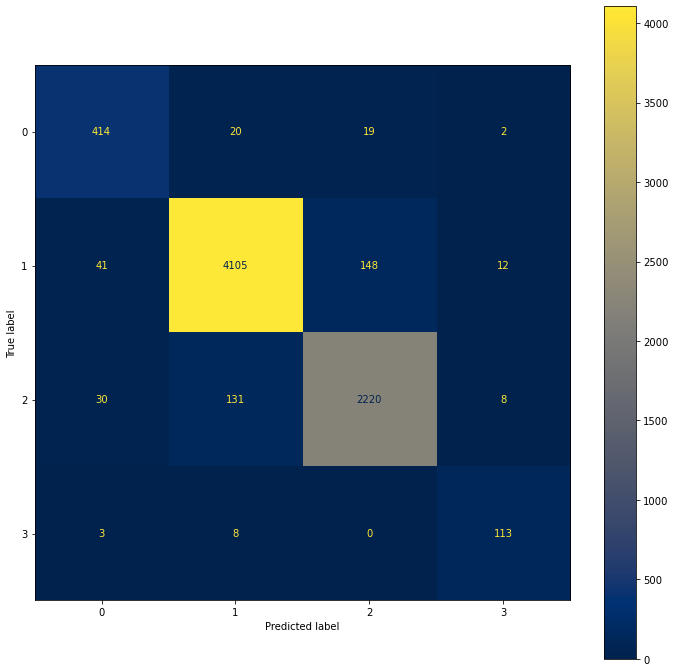

In [93]:
#code inspired by our Flatiron School NLP checkpoint
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(dt, X_test_vect, y_test, ax=ax, cmap="cividis");

In [94]:
dt_crossval_test = cross_val_score(dt, X_test_vect, y_test, cv=5)

In [95]:
dt_crossval_test.mean()

0.5824852876529729

In [118]:
y_test_preds = dt.predict(X_test_vect)

In [119]:
y_test_preds

array([1, 2, 1, ..., 2, 2, 1], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
y_train_preds = dt.predict(X_train_vec)

In [100]:
acc_train = accuracy_score(new_y_train, y_train_preds)

In [101]:
acc_train

0.600974383152601

In [120]:
test_acc = accuracy_score(y_test, y_test_preds)

In [121]:
test_acc

0.9419851525982953

In [112]:
dtree_minleaf = DecisionTreeClassifier(min_samples_leaf=10)
dtree_minleaf.fit(X_train_countvec, new_y_train)

dt_crossval_test = cross_val_score(dtree_minleaf, X_train_countvec, new_y_train, cv=5)
dt_crossval_test.mean()

0.6215611367195798

In [113]:
dtree_minleaf100 = DecisionTreeClassifier(min_samples_leaf=100)
dtree_minleaf100.fit(X_train_countvec, new_y_train)

dt100_crossval_test = cross_val_score(dtree_minleaf100, X_train_countvec, new_y_train, cv=5)
dt100_crossval_test.mean()

0.6016046875849155

In [114]:
dtree_minleaf50 = DecisionTreeClassifier(min_samples_leaf=100)
dtree_minleaf50.fit(X_train_countvec, new_y_train)

dt50_crossval_test = cross_val_score(dtree_minleaf50, X_train_countvec, new_y_train, cv=5)
dt50_crossval_test.mean()

0.6016046875849155

So far, the best crossvalidation scoring is 62% with a tuned Decision Tree to 10 minimum samples per leaf (named "dtree_minleaf". 100 minimum samples made the model perform worse, and so did 50 minimum samples per leaf.

In [116]:
#checking for new accuracy scores
y_train_preds_2 = dtree_minleaf.predict(X_train_countvec)
acc_train_minleaf = accuracy_score(new_y_train, y_train_preds_2)
acc_train_minleaf

0.6789250353606789

In [117]:
#checking the test sets accuracy scores
y_test_preds_2 = dtree_minleaf.predict(X_test_vect)
acc_test_minleaf = accuracy_score(y_test, y_test_preds_2)
acc_test_minleaf

0.6725323068463019

The accuracy scores have significantly increased with our new Decision Tree with 10 minimum samples specified per leaf. Both the training and test sets have similar accuracy scoring of 67%.